# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
from sklearn import metrics

distances = metrics.pairwise_distances(raitings, raitings, metric='cosine')

result = []
for user in range(len(distances)):
    result.append((user, np.argpartition(distances[user], 1)[1]))

result

[(0, 8),
 (1, 4),
 (2, 9),
 (3, 9),
 (4, 8),
 (5, 9),
 (6, 3),
 (7, 5),
 (8, 0),
 (9, 2)]

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
from sklearn.decomposition import PCA

zipped_matrix = PCA(n_components = 5).fit_transform(raitings)

zipped_matrix

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [5]:
from sympy import *

x = symbols('x')

gtg = tan(sin(x) + cos(2*x+3))**2

result = diff(gtg).evalf(subs={x:1})

result

55.3859176353379

$f'(x)$

$= (tg^2(sin(x) + cos(2x+3)))'$

$= 2 * tg(sin(x) + cos(2x+3)) * (tg(sin(x) + cos(2x+3)))' $

$= 2 * tg(sin(x) + cos(2x+3)) * ((sin(x) + cos(2x+3))' / cos^2(sin(x) + cos(2x+3))$

$= 2 * tg(sin(x) + cos(2x+3)) * (cos(x) + cos'(2x+3)) / cos^2(sin(x) + cos(2x+3))$

$= 2 * tg(sin(x) + cos(2x+3)) * (cos(x) - sin(2x+3) * (2x+3)') / cos^2(sin(x) + cos(2x+3))$

$= 2 * tg(sin(x) + cos(2x+3)) * (cos(x) - 2 * sin(2x+3)) / cos^2(sin(x) + cos(2x+3))$

$= 2 * tg(sin(x) + cos(2x+3)) * (cos(x) - 2 * sin(2x+3)) * (1 + tg^2(sin(x) + cos(2x+3)))$

При  $x_0 = 1$

$f'(x_0)$

$= 2 * tg(sin(1) + cos(5)) * (cos(1) - 2 * sin(5)) * (1 + tg^2(sin(1) + cos(5)))$

$= 2 * tg(0.84147 + 0.28366) * (0.5403 - 2 * -0.95892) * (1 + tg^2(0.84147 + 0.28366))$

$= 2 * tg(1,12513) * 2,45814 * (1 + tg^2(1,12513))$

$= 2 * 2.09327 * 2,45814 * (1 + 2.09327^2)$

$= 55.38444$

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

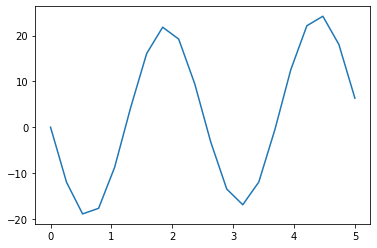

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [11]:
result = minimize(error, np.array([0,0]), method='COBYLA')
result

     fun: 0.043631576926070004
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 152
  status: 1
 success: True
       x: array([ 3.0000271 , -2.49993557])

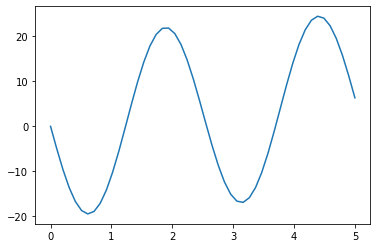

In [12]:
test_x = [];
test_xf = [];
for i in np.linspace(0, 5):
    test_x.append(i)
    test_xf.append(f(i, result.x[0], result.x[1]))
    
plt.plot(test_x, test_xf)
plt.show()

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

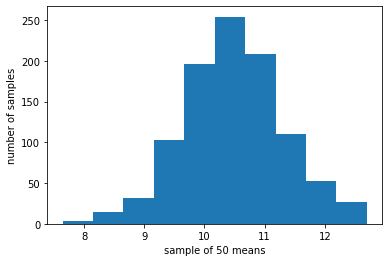

In [13]:
def random_var():
    return np.random.randint(1,21)

means = []
for i in range(1000):
    sample = []
    
    for m in range(50):
        sample.append(random_var())
        
    means.append(np.mean(sample))

plt.hist(means)
plt.xlabel('sample of 50 means')
plt.ylabel('number of samples')
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [14]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [15]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

**Характеристическое уравнение матрицы:**

(1 - a)*(1 - a) - 4 * 1 = 0

a^2 - 2a - 3 = 0

Корни 3, -1 (они же - собственные значения)

**Подставляем первое значение, находим коофициэнты преобразования и первый собственный вектор**

-2x + 4y = 0

1x -2y = 0

Следовательно

x = 2y

Первый собственный вектор (2, 1)

**Подставляем второе значение, находим коофициэнты преобразования и второй собственный вектор**

2x + 4y = 0

1x + 2y = 0

Следовательно

x = -2y

Второй собственный вектор (-2, 1)